In [2]:
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plot
import numpy as np
from skimage import color
from skimage import io
from random import shuffle

In [3]:
current_dir = os.getcwd()
print(current_dir)

E:\UNet


In [4]:
files = os.listdir("./Carvana/train/")
shuffle(files)
print(files)
print(len(files))

['7bd1142155ae_16.jpg', '8d5423cb763c_02.jpg', '3627b6f4c16d_10.jpg', '553c658b9efa_05.jpg', '0d1a9caf4350_08.jpg', 'cf89c3220bc4_11.jpg', '0d3adbbc9a8b_14.jpg', 'b1a27da4f01c_07.jpg', '6ba36af67cb0_03.jpg', '8b4b87ad7be6_13.jpg', '5588758ee21c_16.jpg', 'd8216041ffa9_11.jpg', 'a7c1ef8d9cc9_02.jpg', '0d3adbbc9a8b_01.jpg', '31186febd775_07.jpg', 'cafee4122080_06.jpg', '4a4364d7fc6d_05.jpg', 'bec93f7ddb19_09.jpg', '88bc32b9e1d9_10.jpg', '11acc40dc0ea_10.jpg', '66fea07e1152_07.jpg', 'd326cb5c3d12_07.jpg', 'c8d52e0ba341_15.jpg', 'f3eee6348205_13.jpg', 'f1eb080c7182_12.jpg', '0795e132d090_07.jpg', '42415ff65013_03.jpg', '120c1dc7b116_01.jpg', 'f7ad86e13ed7_12.jpg', '21a7e6726ee3_07.jpg', 'de3ca5ec1e59_03.jpg', '28d9a149cb02_14.jpg', '351c583eabd6_06.jpg', '344ece157efc_14.jpg', 'dc995bf5296a_08.jpg', 'bb7625a3f1d4_11.jpg', '4baf50a3d8c2_03.jpg', '1c5748340af8_03.jpg', 'c502287be9f6_15.jpg', '9ab2a45de8c7_15.jpg', 'ae296a20fdd9_07.jpg', '87e334269396_06.jpg', '33a310ea7462_05.jpg', '2a4a8964e

In [9]:
mean = np.zeros((256,256))
print(mean.shape)
for i in files:
    temp = np.array(Image.open(f"./Carvana/train/{i}").convert('L').resize((256,256)))
    mean = mean + temp
mean = mean/len(files)
print(mean)

(256, 256)
[[243.7413522  243.57704403 243.45400943 ... 239.57075472 239.64426101
  239.5807783 ]
 [243.7413522  243.57704403 243.45400943 ... 239.58903302 239.66312893
  239.59964623]
 [243.64878145 243.52437107 243.40998428 ... 239.52122642 239.6259827
  239.5528695 ]
 ...
 [194.40880503 194.6884827  195.1971305  ... 196.69418239 196.5625
  196.71462264]
 [194.0442217  194.29127358 194.22857704 ... 197.54284591 197.63384434
  197.4817217 ]
 [193.91077044 194.02397799 194.0851022  ... 197.97641509 198.03950472
  197.98683176]]


In [10]:
np.save("./d/Carvana/mean_of_traindata", mean)

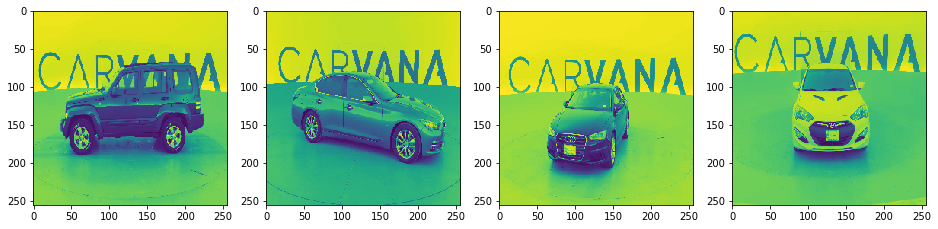

done


In [8]:
for bn in range(len(files)//8):
    images = []
    for i in range(bn*8, (bn+1)*8):
        img_temp = Image.open(f"./Carvana/train/{files[i]}").convert('L')
        images.append(np.array(img_temp.resize((256,256))))
        np.save(f"{current_dir}/d/Carvana/train_x/x_orig{bn}", images)


fig = plot.figure(figsize = (16, 16))
for i in range(1, 5):
    fig.add_subplot(1, 4, i)
    plot.imshow(images[i-1])
plot.show()
print("done")

In [20]:
mfiles = []
for name in files:
    mfiles.append(name[:15] + '_mask.gif')
print(mfiles)

['f98dbe8a5ee2_01_mask.gif', '11fcda0a9e1c_09_mask.gif', '42b3feca1993_12_mask.gif', 'c9f382c7349e_01_mask.gif', 'fa006be8b6d9_05_mask.gif', '34b0c08544a5_14_mask.gif', 'cafee4122080_12_mask.gif', '1c5748340af8_03_mask.gif', '02159e548029_13_mask.gif', '6e016b8b3617_09_mask.gif', '11fcda0a9e1c_13_mask.gif', '3afec4b5ac07_05_mask.gif', 'c8d52e0ba341_11_mask.gif', 'fc237174b128_08_mask.gif', '68fcee2be01f_01_mask.gif', '4a4364d7fc6d_11_mask.gif', '4fc2470c0f7b_11_mask.gif', '40851e617b93_15_mask.gif', '02159e548029_16_mask.gif', '42d81612e2ce_12_mask.gif', '6752de44b721_16_mask.gif', '898339fab87a_03_mask.gif', '23c088f6ec27_08_mask.gif', '717689f3e788_10_mask.gif', 'b98c63cd6102_07_mask.gif', '3b45f83ba3fa_16_mask.gif', 'ddb513df9406_02_mask.gif', 'a1038b207299_12_mask.gif', '0ed6904e1004_07_mask.gif', '4df1536de792_12_mask.gif', 'be86e79f1225_01_mask.gif', '86c10c8c6206_15_mask.gif', '8b4b87ad7be6_08_mask.gif', '66fea07e1152_16_mask.gif', '9dfaeb835626_01_mask.gif', '6ae670e86620_07_ma

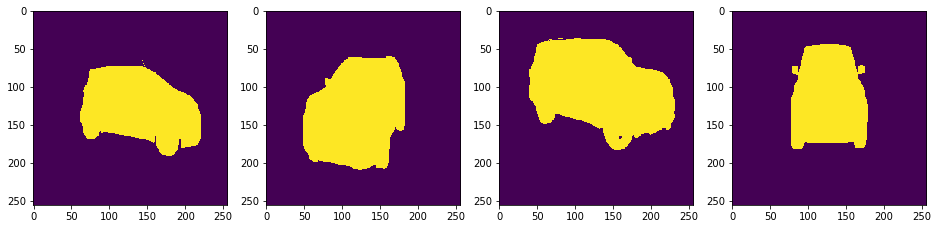

done


In [21]:
for bn in range(len(mfiles)//8):
    image_masks = []
    for i in range(bn*8, (bn+1)*8):
        img_temp = Image.open(f"./Carvana/train_masks/{mfiles[i]}")
        image_masks.append(np.array(img_temp.resize((256,256))))
        np.save(f"{current_dir}/d/Carvana/train_y_sparse/y_labels{bn}", image_masks)
        

fig1 = plot.figure(figsize = (16, 16))
for i in range(1, 5):
    fig1.add_subplot(1, 4, i)
    plot.imshow(image_masks[i-1])
plot.show()
print("done")

In [23]:
print(image_masks[3][:, 80])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
imgs = np.load("./d/Carvana/train_x/x_orig0.npy")
img_masks = np.load("./d/Carvana/train_y_sparse/y_labels0.npy")
print(imgs.shape)
if len(imgs.shape)==3:
    imgs = np.expand_dims(imgs, axis=3)
print(imgs.shape)
print(img_masks.shape)
imgs = imgs/255

(8, 256, 256)
(8, 256, 256, 1)
(8, 256, 256)


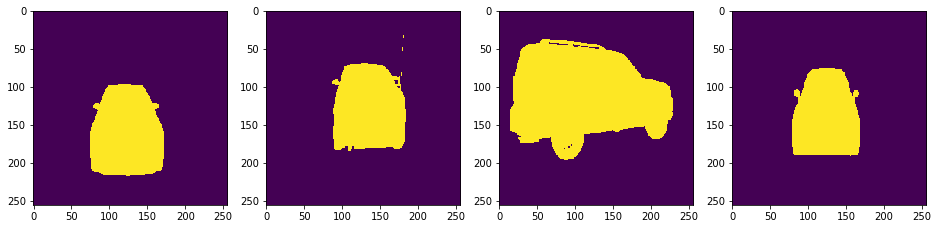

In [40]:
fig1 = plot.figure(figsize = (16, 16))
for i in range(1, 5):
    fig1.add_subplot(1, 4, i)
    plot.imshow(img_masks[i-1])
plot.show()

TypeError: Invalid dimensions for image data

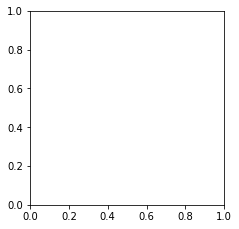

In [41]:
fig = plot.figure(figsize = (16, 16))
for i in range(1, 5):
    fig.add_subplot(1, 4, i)
    plot.imshow(imgs[i-1])
plot.show()

In [42]:
def zero_mean_batch(batch):
    meaned_batch = batch
    mean = np.mean(batch, axis=0)
    for i in range(len(batch)):
        meaned_batch[i] = batch[i] - mean
    return meaned_batch

print(imgs.shape)
imgs = zero_mean_batch(imgs)
print(imgs.shape)

(8, 256, 256, 1)
(8, 256, 256, 1)
